## DSCI100 GROUP PROJECT

##### Group Members: Aasha (72670417), Jamie (70834411), Nathelie (**add student#**), April (24654865)
##### Group Number: 007-39

In [1]:
#loading packages
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Introduction
#### Background Information:
This project analyzes real-world data collected from a Minecraft research server (plaicraft.ai), run by the PLAI group of the UBC Computer Science department.             
The goal is to help researchers find out which "kinds" of players are most likely to contribute a large amount of data, so that they can maximize the amount of data collected with their limited resources.              
Specifically, the project will focus on predicting how much playing time a player contributes to the research based on their age and experience. The longer the play time, the more data the participant contributes. 

#### Research Question: Can player age and player experience predict the duration of playing?

#### Dataset Description
Two datasets were provided for this project, namely "players.csv" (assigned to `players`), and "sessions.csv" (assigned to `sessions`).           
`players` stores information about each research participant, while `sessions` stores information about each unique playing session.         

In [2]:
#initial data loading
players <- read_csv("https://raw.githubusercontent.com/jamiekyh/dsci100_project/refs/heads/main/players.csv")
head(players)

sessions <- read_csv("https://raw.githubusercontent.com/jamiekyh/dsci100_project/refs/heads/main/sessions.csv")
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


#### Dataset Description: `players`
Now that we have loaded the entire comma-separated values file, we need to narrow the data down to what we need to answer the question.        
To answer our question, we will be using the `players` dataset to obtain data on players' age, experience and hours played.             

##### Summary
Let's take the summary and break down what is in the dataset:


In [3]:
summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               

To answer our question we will be using the dataset `players` to gain data on each players age, experience and hours played. Lets take the summary and breakdown whats in the dataset:

Tabulated summary of `players`:
| Variable         | Type   | Description |number of rows|
|-----------------|--------|-------------|--------|
| experience      | character | Player's self-reported experience level (e.g., Beginner, Regular, Veteran) | 196 |
| subscribe | logical | Whether the player is subscribed to a game-related newsletter | 196 |
| hashedEmail       | character | Unique identifier for each player | 196 |
| played_hours    | double | Total duration the player spent in the game | 196 |
| name    | character | Name of player | 196 |
| gender          | character | Player's gender (e.g., Male, Female, Other) | 196 |
| Age            | double | Player’s age in years| 196 |

The table above gives us a clear and legible summary of the dataset.                     
Each variable is named, along with the data type, description of the variable, and the number of entries for each variable.            

There are a few things to note from this table:    

                   
First, `Age` is of double type, although the ages listed are integers. Although the data type is not a problem for our data analysis, there is a hidden assumption that age is a discrete numerical variable, and thus should be treated as a categorical variable rather than a continuous one.                       
To address this problem, the distance between two ages will be defined as the absolute value of the difference between the two age values.
                 
                
Secondly, both of our predictors (`experience` and `Age`) are technically categorical. To be able to use these variables in a KNN regression model, these categorical data have to be converted into numerical values, with levels assigned according to increasing player experience and increasing player age.
While this "levelling" step is already done for `Age` (as a larger age has a larger numerical value), it has to be done manually for `experience`. This process will be included in the data wrangling portion in the Methods section.

## Methods

To answer our question of whether player age and experience can predict playing time, our analysis will involve data wrangling and cleaning, predictive modelling through KNN regression, and visualization of the obtained results.

First, the `players` dataset has to be tidied:
* `experience` should be of factor type rather than character, due to the ordered nature of experience: "Beginner" < "Amateur" < "Regular" < "Pro" < "Veteran"
* `Age` is a discrete numerical variable, so it should be of integer type rather than double.         
                
               
Below, the data is wrangled into a tidy format:

In [4]:
##wrangling the relevant datasets ("players.csv") into a tidy format:

tidy_players <- players |>
    mutate(experience = factor(experience, levels = c("Beginner", "Amateur", "Regular", "Pro", "Veteran"))) |>
    mutate(Age = as.integer(Age))
head(tidy_players)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In order to narrow our data down to what we need for our research question, we need to ask what columns we would select for.            
In this case, since we are predicting playing duration from player age and experience, we need three variables: player age (`Age`), player experience (`experience`), and play duration (`played_hours`).   
We also want to ignore and omit any NA values in our observations.
Below, we create a more targeted object containing only those three variables:

In [5]:
target_players <- tidy_players |>
    select(experience, Age, played_hours) |>
    na.omit(tidy_players)
head(target_players)

experience,Age,played_hours
<fct>,<int>,<dbl>
Pro,9,30.3
Veteran,17,3.8
Veteran,17,0.0
Amateur,21,0.7
Regular,21,0.1
Amateur,17,0.0


##### Summarizing the data set for exploratory analysis

Below is a summary of `Age` and `played_hours`, the two numerical variables involved in our data analysis:

In [6]:
mean_players <- target_players |>
    select(Age, played_hours) |>
    map_dfr(mean, na.rm = TRUE) |>
    as.data.frame()
colnames(mean_players) <- c("Mean Age of Participants", "Mean Duration Played (hours)")
mean_players

min_players <- target_players |>
    select(Age, played_hours) |>
    map_dfr(min, na.rm = TRUE) |>
    as.data.frame()
colnames(min_players) <- c("Minimum Age of Participants", "Minimum Duration Played (hours)")
min_players

max_players <- target_players |>
    select(Age, played_hours) |>
    map_dfr(max, na.rm = TRUE) |>
    as.data.frame()
colnames(max_players) <- c("Maximum Age of Participants", "Maximum Duration Played (hours)")
max_players

Mean Age of Participants,Mean Duration Played (hours)
<dbl>,<dbl>
20.52062,5.904639


Minimum Age of Participants,Minimum Duration Played (hours)
<int>,<dbl>
8,0


Maximum Age of Participants,Maximum Duration Played (hours)
<int>,<dbl>
50,223.1


The following table summarizes the above statistics:

| Variable | Mean | Min | Max |
|----------|------|-----|-----|
| Age | 20.5206 | 8 | 50 |
| played_hours | 5.8459 | 0 |223.1 |

To understand the distribution of player experience, we count the number of players within each experience level:

In [7]:
count <- target_players |>
    group_by(experience) |>
    summarize(n = n())
count

experience,n
<fct>,<int>
Beginner,35
Amateur,63
Regular,35
Pro,13
Veteran,48


There are 35 beginners, 63 amateur, 36 regular, 14 pro, and 48 veteran players in the dataset.

##### Visualising the data set for exploratory analysis
The above data can also be visualized through graphs to provide a more direct understanding: 

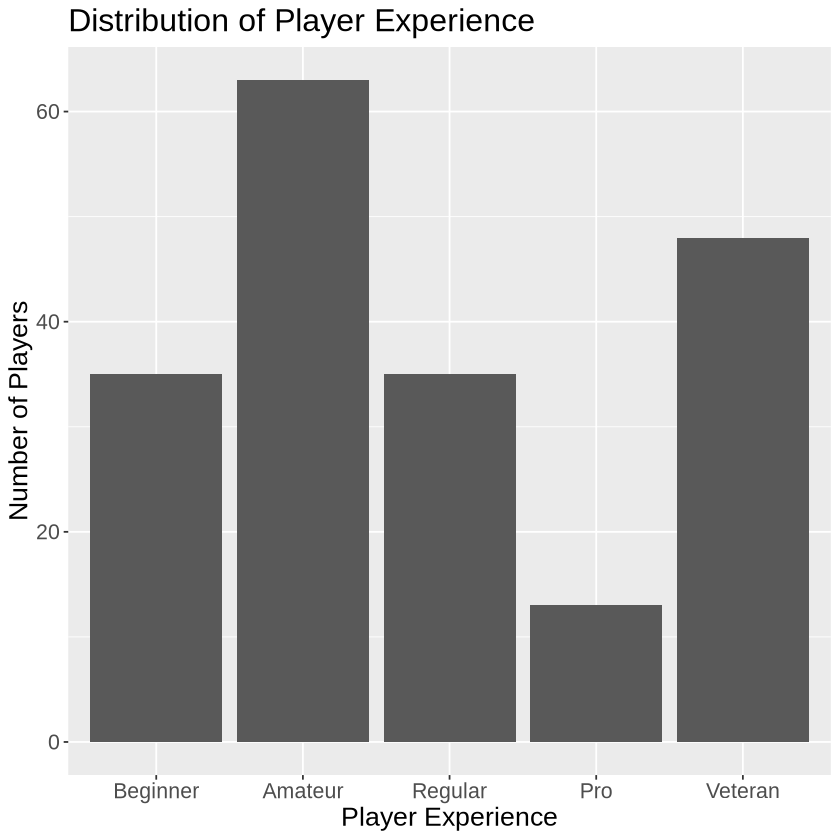

In [8]:
##distribution of player experience -need to add figure legend and number!!
exp_distribution <- target_players |>
    ggplot(aes(x = experience)) +
        geom_bar(stat = "count") +
        labs(x = "Player Experience", y = "Number of Players", title = "Distribution of Player Experience") +
        theme(text = element_text(size = 16))
exp_distribution

>*Figure 1: Number of players for each experience level. Player experience is on the x-axis and number of players is on the y-axis. Amateure is the experience level with the most number of players compared to the other experience leveles evident by the largest bar. It is followed by veteran, then regular and beginner tied for third, and finallly pro with the least number of players compared to the others (evident by the smallest bar).*

Before applying KNN regression to the dataset, we should use numbers to represent different categories in `experience`. 

In [9]:
target_players <- target_players |> 
                  mutate(experience = recode(experience, 
                                             "Beginner" = 1, 
                                             "Amateur" = 2, 
                                             "Regular" = 3,
                                             "Pro" = 4, 
                                             "Veteran" = 5))
head(target_players)
tail(target_players)

experience,Age,played_hours
<dbl>,<int>,<dbl>
4,9,30.3
5,17,3.8
5,17,0.0
2,21,0.7
3,21,0.1
2,17,0.0


experience,Age,played_hours
<dbl>,<int>,<dbl>
2,17,0.0
2,20,0.0
2,17,0.0
5,22,0.3
2,17,0.0
2,17,2.3


### Predicting duration of playing

Load the `target_players` data.

In [10]:
target_players

experience,Age,played_hours
<dbl>,<int>,<dbl>
4,9,30.3
5,17,3.8
5,17,0.0
2,21,0.7
3,21,0.1
2,17,0.0
3,19,0.0
2,21,0.0
2,17,0.1


First, we need to create the training and testing datasets. Split the data using 75% of the `target_players` data and set `played_hours` as the strata argument. Store this data into an object called `target_players_split`.

Then, we need to create a training set called `target_players_training` and a testing set called `target_players_testing`. 

In [11]:
set.seed(2025) 

target_players_split <- initial_split(target_players, prop = 0.75, strata = played_hours)
target_players_training <- training(target_players_split)
target_players_testing <- testing(target_players_split)

Next, we’ll use cross-validation on our training data to choose $k$. In this case, we will use RMSPE.

Store our model specification in an object called `target_players_spec`.

Store our recipe in an object called `target_players_recipe`. The response variable is `played_hours` and the predictors are `experience` and `Age`.

In [12]:
set.seed(2025) 

target_players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
      set_engine("kknn") |>
      set_mode("regression") 

target_players_recipe <- recipe(played_hours ~ experience + Age, data = target_players_training) |>
      step_scale(all_predictors()) |>
      step_center(all_predictors())
 
target_players_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



Now, create the splits for cross-validation with 5 folds. Store our answer in an object called `target_players_vfold`. Set `played_hours` as the strata argument.

Then, use the workflow function to combine specification and recipe. Store our answer in an object called `target_players_workflow`.

In [13]:
set.seed(2025) 
 
target_players_vfold <- vfold_cv(target_players_training, v = 5, strata = played_hours)
target_players_workflow <- workflow() |>
                           add_recipe(target_players_recipe) |>
                           add_model(target_players_spec) 

target_players_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


Now, use the RMSPE to find the best setting for $k$. We test the values $k = 1, 2, 3, 4, ..., 50$.

First, create a tibble with a column called `neighbors` and assign that tibble to an object called `gridvals`. 

Next, tune the workflow such that it tests all the values in `gridvals`. 

Finally, collect the statistics and find the minimum RMSPE. Store our answer in an object called `target_players_min`.

In [14]:
set.seed(2025) 

gridvals <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

target_players_min <- target_players_workflow |>
                      tune_grid(resamples = target_players_vfold, grid = gridvals) |>
                      collect_metrics() |>
                      filter(.metric == "rmse") |>
                        slice_min(mean, n=1)
target_players_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
23,rmse,standard,30.41091,5,4.657621,Preprocessor1_Model23


Next, we can assign our k value to an object called `kmin` and  evaluate our model's performance on unseen data by re-training the K-NN regression model using `kmin`. After re-training, we will predict on the test data and use `metrics` to calculate regression quality.

In [15]:
kmin <- target_players_min |> pull(neighbors)

final_target_players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |> 
      set_engine("kknn") |>
      set_mode("regression")

final_target_players_workflow <- target_players_workflow |>
      update_model(final_target_players_spec) |>
      fit(data = target_players_training)

target_players_summary <- final_target_players_workflow |>
  predict(target_players_testing) |>
  bind_cols(target_players_testing) |>
  metrics(truth = played_hours, estimate = .pred) |>
  filter(.metric == 'rmse')

target_players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,12.99674


The final k-NN regression model with k = 23 achieved an RMSE of 12.99674 on the test data, therefore, on average, the model's predictions are about 13 hours off from the actual number of hours a player played.

Next, we will visualize the relationship between the predictor `experience` and the target variable `played_hours` using a scatter plot and the model's predicted values. This will help us assess how well the K-NN regression model, with the optimal value of k, predicts play hours based on player experience. 

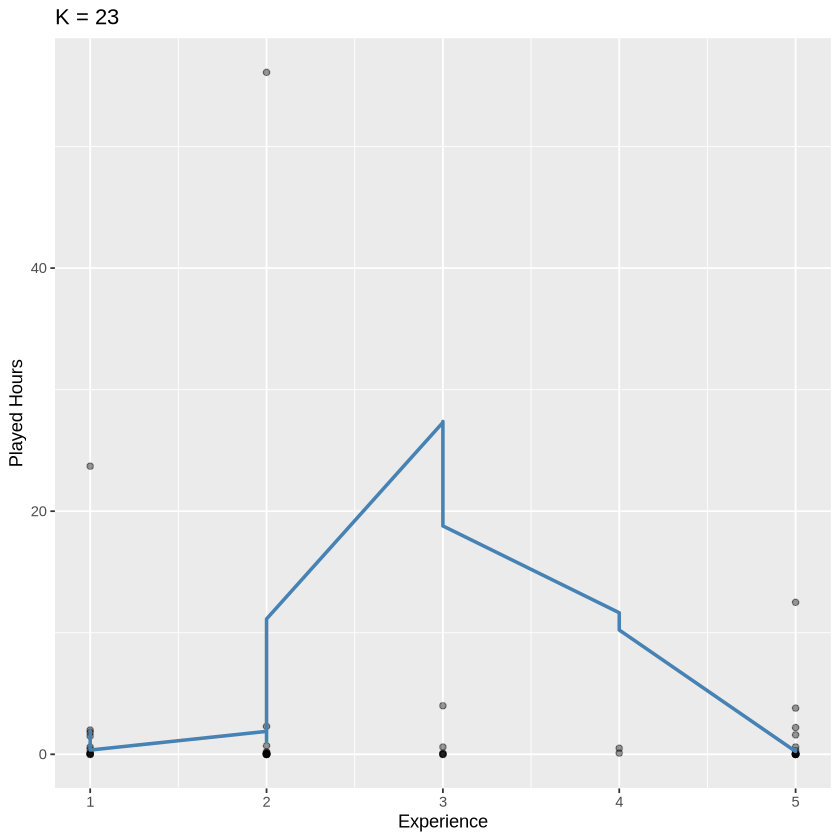

In [28]:
target_players_preds <- final_target_players_workflow |>
  predict(target_players_testing) |>
  bind_cols(target_players_testing)

plot_final_experience <- ggplot(target_players_testing, aes(x = experience, y = played_hours)) +
  geom_point(alpha = 0.4) +
  geom_line(data = target_players_preds,
            mapping = aes(x = experience, y = .pred),
            color = "steelblue",
            linewidth = 1) +
  xlab("Experience") +
  ylab("Played Hours") +
  ggtitle("K = 23")
plot_final_experience

>*Figure 2*: 

## Discussion